# Clustering

We apply a machine learning algorithm to the dataset `country_data.csv`. This data set contains information about a countries child mortality, exports, health spending, etc. <br>

Use **clustering** to investigate this data set. After clustering the data you should analyse the results and discuss what can be concluded by the clusters. <br> <br>
Ideas to consider when completing this task:
- Is there a way of visualising the clusters?
- Can you make any conclusions about the clustering?
- Include as many features as you can. Does the clustering change?
- What advice would you give, in the context of the data, based on the clustering?

## Data Preparation

#### Importing libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

# machine learning
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score #evaluation metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# remove warnings
import warnings;warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
data = pd.read_csv('country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Exploring Data

In [3]:
print(data.columns.tolist())

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


**Meaning of Columns in the dataset** <br>

1. 'country': This column contains the names of different countries, and it serves as a unique identifier for each country in the dataset.

2. 'child_mort': This column represents the child mortality rate, which is the number of child deaths per 1,000 live births in a given country. It is often used as an indicator of the overall health and well-being of a country's population.

3. 'exports': This column typically represents the percentage of a country's Gross Domestic Product (GDP) that comes from exports. It can be an important economic indicator, reflecting a country's reliance on international trade.

4. 'health': This column represents the percentage of a country's GDP spent on healthcare and public health expenditures. It is an indicator of the healthcare infrastructure and resources available in a country.

5. 'imports': Similar to 'exports,' this column represents the percentage of a country's GDP spent on imports. It reflects a country's dependence on foreign goods and services.

6. 'income': This column represents the per capita income or Gross National Income (GNI) of a country. It provides an estimate of the average income of the population, which is often used as a measure of the standard of living.

7. 'inflation': This column represents the annual inflation rate, which measures the percentage increase in the general price level of goods and services over a year. Inflation can have significant economic implications.

8. 'life_expec': This column represents the average life expectancy at birth for the population of a country. It is a key indicator of the overall health and well-being of a population.

9. 'total_fer': This column typically represents the Total Fertility Rate (TFR) in a country. TFR is the average number of children a woman is expected to have during her lifetime. It is an important demographic indicator.

10. 'gdpp': This column represents the Gross Domestic Product per capita (GDP per capita) for a country. It is a measure of the economic output per person and is often used to assess the economic well-being of a nation.

In [4]:
# dimension of data
print(data.shape)
# summary of data
data.info()

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Checking for missing values

In [5]:
# checking for missing values
missing_val = pd.concat([data.isnull().sum(), (data.isnull().mean() * 100).round(2)], axis=1, keys=['Total', 'Percentage of Missing Values (%)'])
missing_val = missing_val[missing_val['Total'] > 0].sort_values(by='Total', ascending=False)
print('Checking for null values in the dataset')
missing_val

Checking for null values in the dataset


,Total,Percentage of Missing Values (%)


As can be seen above, there are no missing values in the dataset.

In [6]:
# Generate descriptive statistics
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Feature Engineering
Engineering or creating new features from the previously existing features to enhance the performance of the model.

In [7]:
# copy data to new variable, df
df = data.copy()

In [8]:
# economic dependency ratio
df['economic_dependency_ratio'] = df['exports'] / df['imports']

# Economic Development Level
income_bins = [0, 3355, 9960, 22800, float('inf')]
income_labels = ['Very Low', 'Low', 'Middle', 'High']
df['economic_development_level'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

# Ratio of Income to Health Spending
df['income_to_health_ratio'] = df['income'] / (df['health'] / 100)

# Life Expectancy Gap
df['life_expec_gap'] = df['life_expec'].max() - df['life_expec'].min()

# Inflation Category
inflation_bins = [-float('inf'), 1.81, 5.39, 10.75, float('inf')]
inflation_labels = ['Very Low', 'Low', 'Moderate', 'High']
df['inflation_category'] = pd.cut(df['inflation'], bins=inflation_bins, labels=inflation_labels)

**An explanation of the new columns engineered in the code above:** <br>

1. Economic Dependency Ratio: This is the ratio of exports to imports
2. Economic Development Level: This indicates the various levels of Income categorized into *Very Low*, *Low*, *Middle* and *High*
3. Income-to-Health-Ratio: This is the ratio of Income to Health
4. Life Expectancy Gap: This feature puts into consideration the difference between the difference between the maximum and minimum life expectancy at birth for the population of a country.
5. Inflation Category: This indicates the various levels of Inflation categorized into *Very Low*, *Low*, *Moderate* and *High*

In [9]:
# random smaples of the data after adding new features
df.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,economic_dependency_ratio,economic_development_level,income_to_health_ratio,life_expec_gap,inflation_category
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0.639785,Very Low,4.439024e+04,50.7,Very Low
86,Lebanon,10.3,35.80,7.03,60.2,16300,0.238,79.8,1.61,8860,0.594684,Middle,2.318634e+05,50.7,Very Low
104,Montenegro,6.8,37.00,9.11,62.7,14000,1.600,76.4,1.77,6680,0.590112,Middle,1.536773e+05,50.7,Very Low
109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,0.263187,Very Low,3.790476e+04,50.7,High
131,Seychelles,14.4,93.80,3.40,108.0,20400,-4.210,73.4,2.17,10800,0.868519,Middle,6.000000e+05,50.7,Very Low
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0.845977,Very Low,4.260486e+04,50.7,Moderate
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300,2.407143,High,2.838028e+06,50.7,High
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,0.205579,Very Low,5.338346e+04,50.7,High
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300,1.503030,High,1.058275e+06,50.7,High
19,Bolivia,46.6,41.20,4.84,34.3,5410,8.780,71.6,3.20,1980,1.201166,Low,1.117769e+05,50.7,Moderate


## Exploratory Data Analysis
In the Exploratory Data Analysis (EDA) section, the dataset will be investigated and its main features summarized. The primary goal of EDA is to help understand and summarize the contents of a dataset, typically with a specific question in mind, or to prepare for more advanced statistical modeling in future stages of data analysis

In [10]:
# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]

# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)

# Use the custom palette with a seaborn function
sns.set_palette(my_palette)

from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#a3f7bf', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

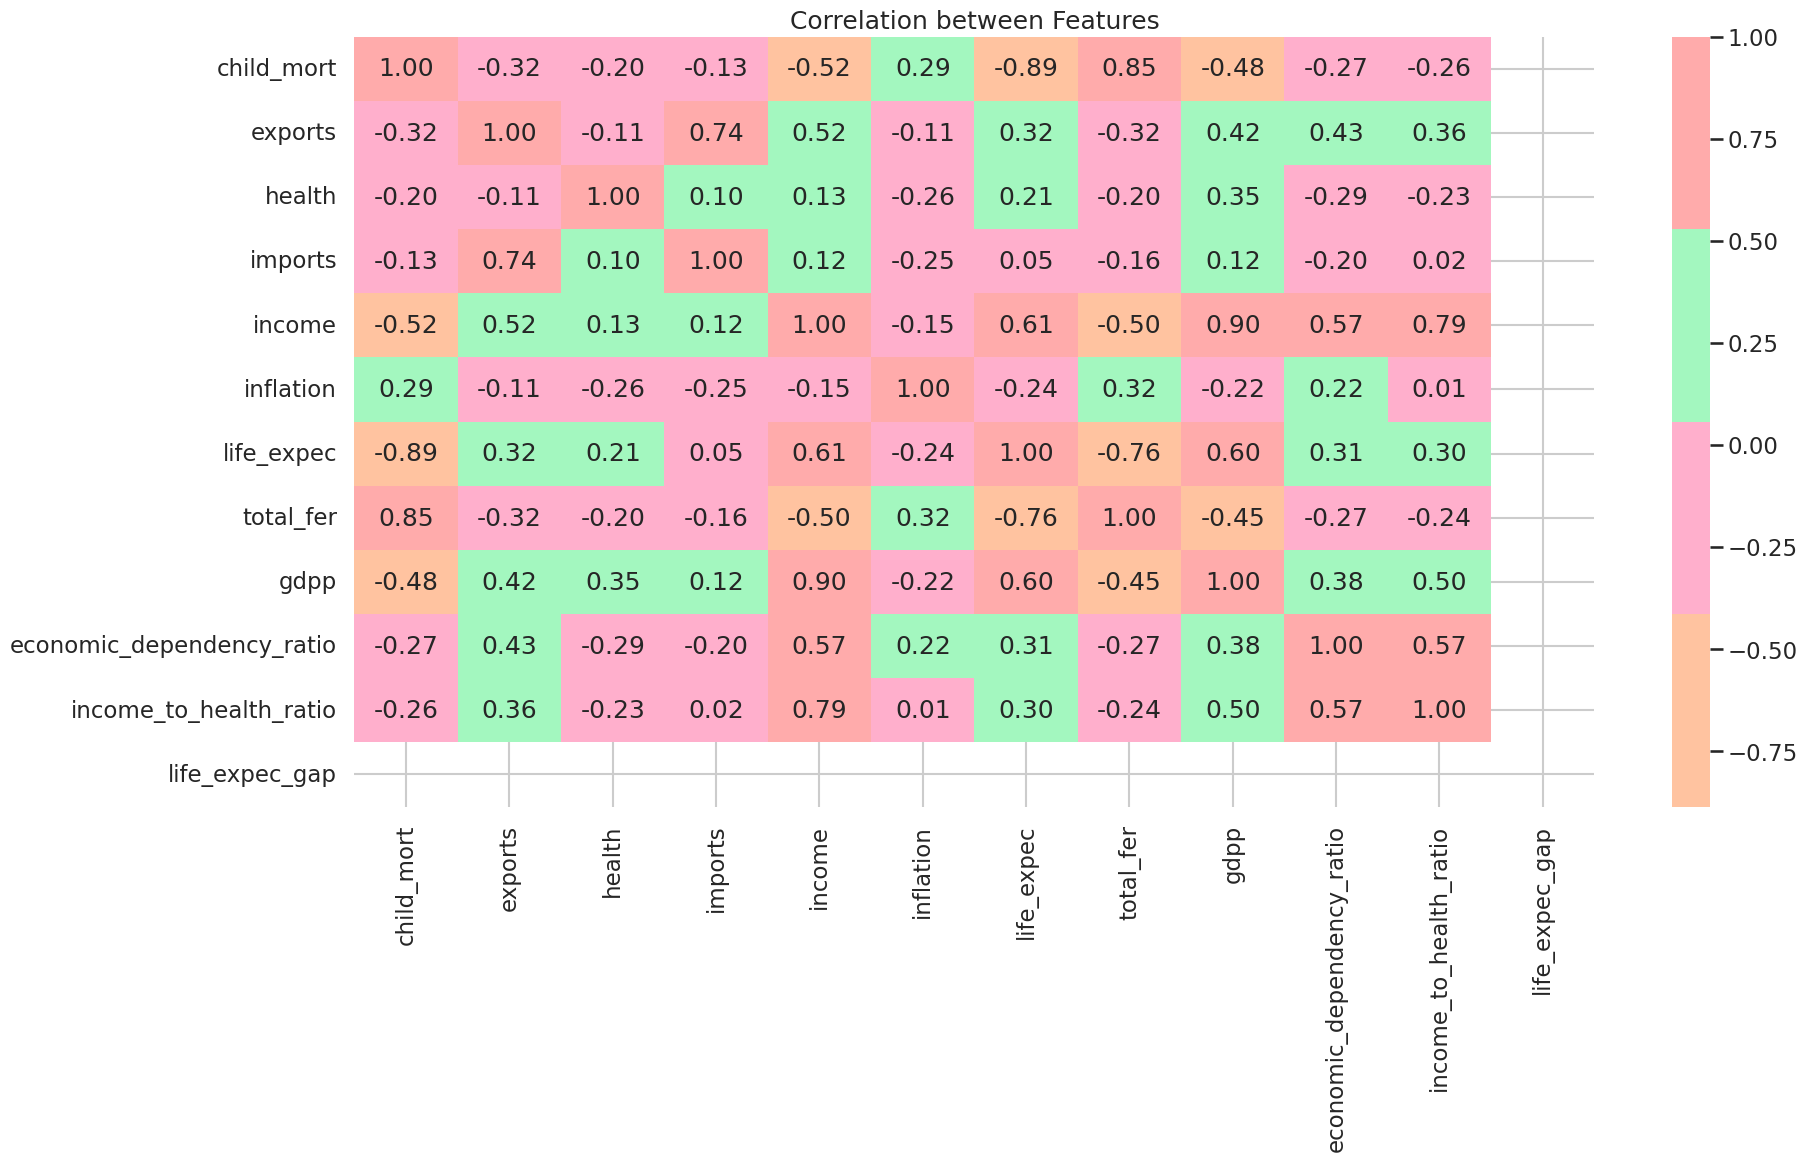

In [11]:
# correlation between features
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=cmap, fmt='.2f').set(title='Correlation between Features')
plt.show;

In the heatmap above, it is observed that `child_mort` is strongly correlated with `gdpp`. Additionally, `exports` shows a strong connection with `imports` and a moderate relationship with `income`. Moreover, a notable relationship exists between `income` and `gdpp` as well as `life_expec`. The correlation between `life_expec` and `gdpp` is particularly strong, with a correlation coefficient of 0.61.

The level of correlation between these features suggests that there are significant connections between them. For example, a high positive correlation between 'child_mort' and 'gdpp' implies that lower GDP per capita tends to be associated with higher child mortality rates. Similarly, the strong correlation between 'income' and 'gdpp' indicates that higher income is linked to a higher GDP per capita.

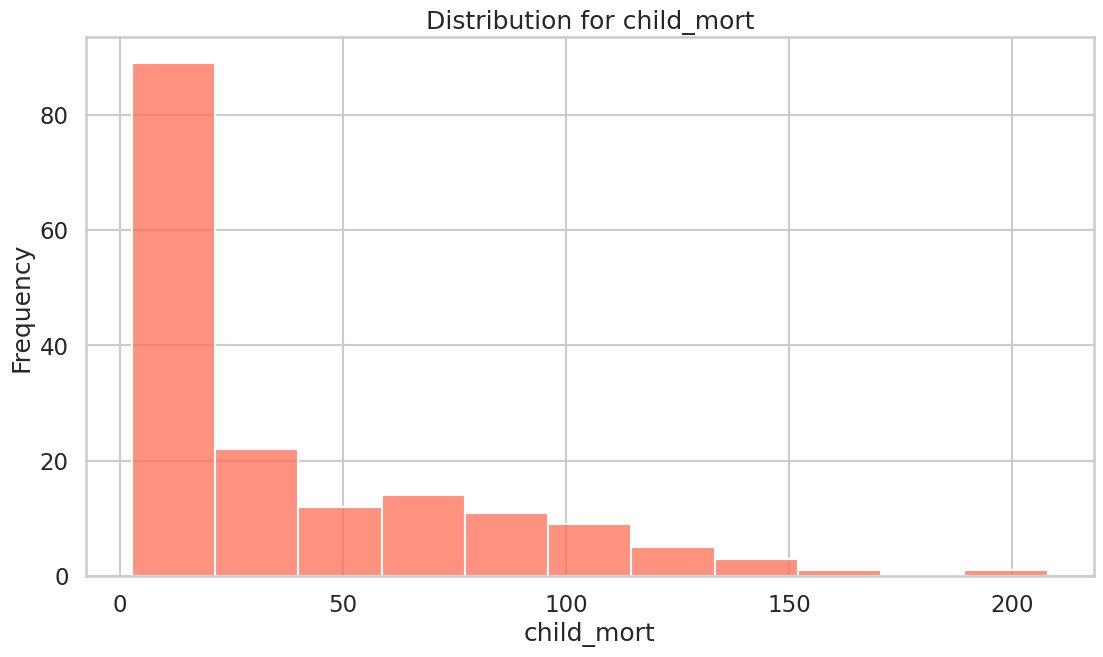

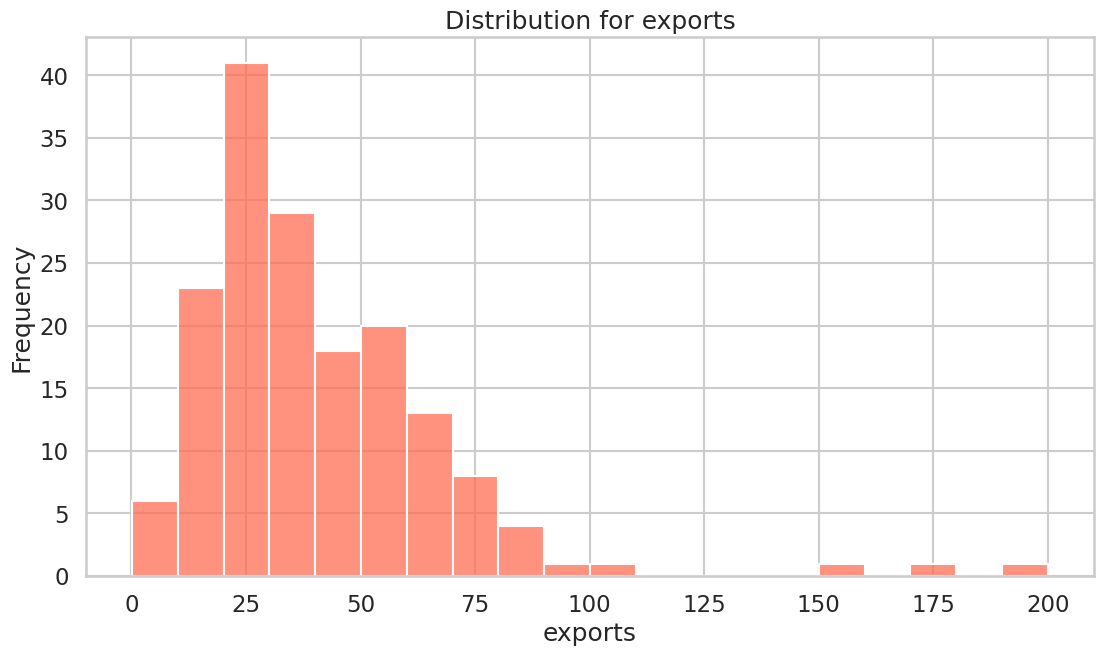

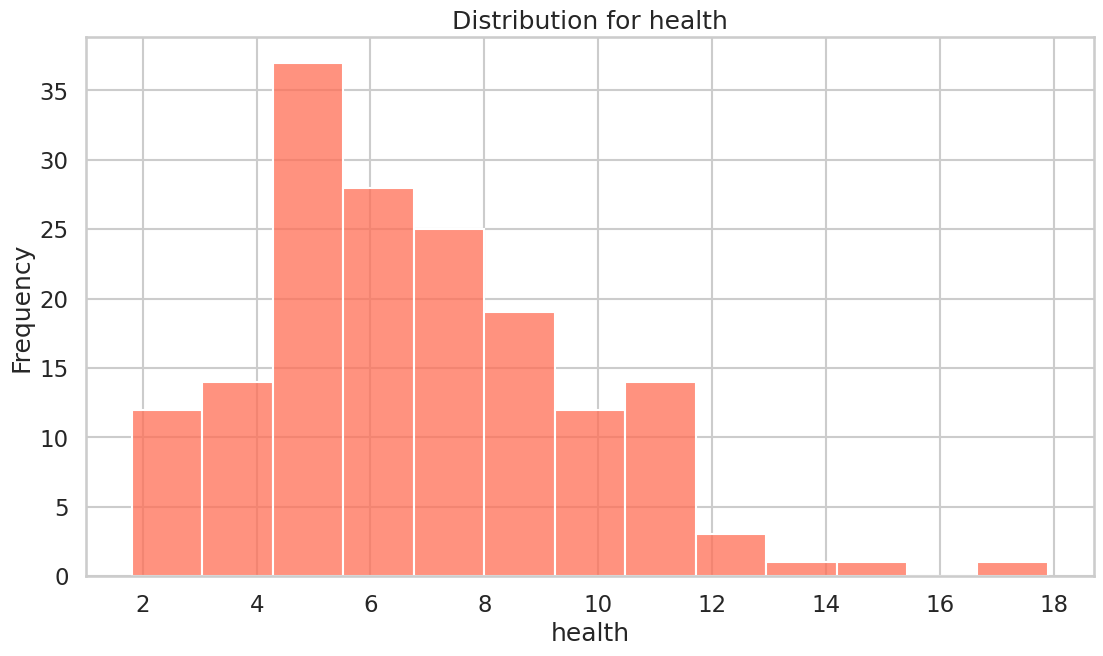

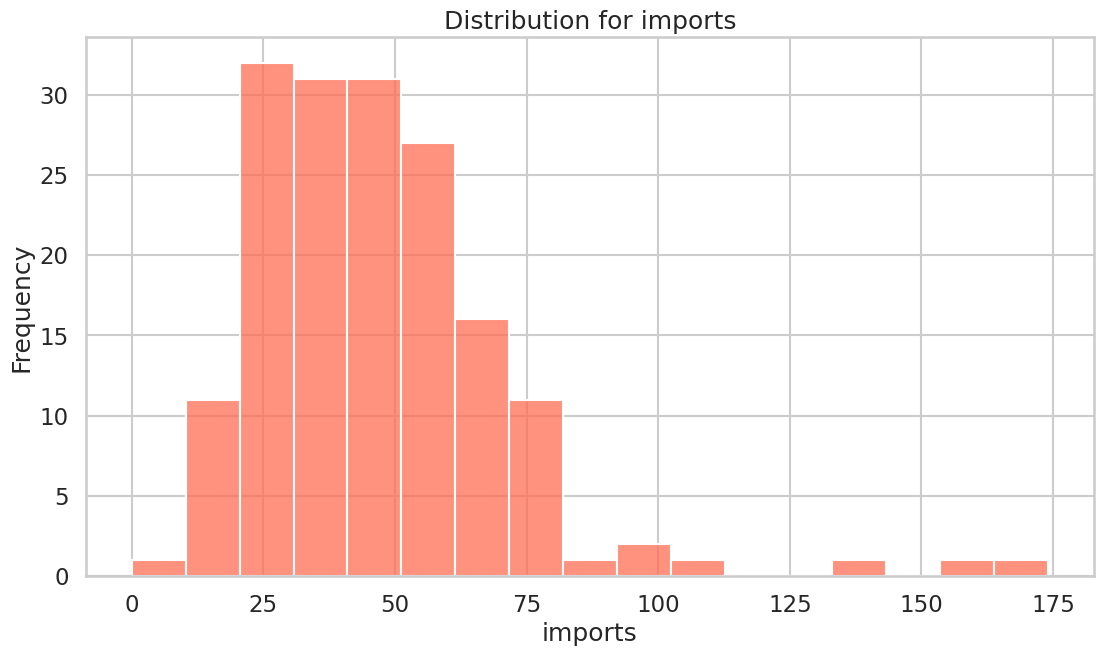

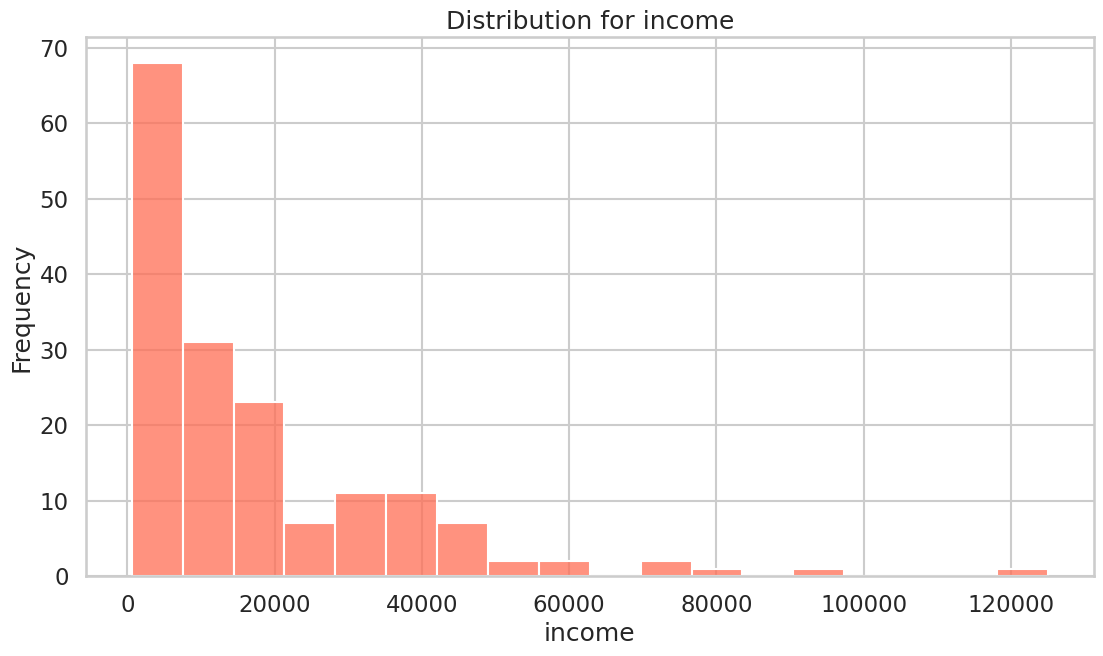

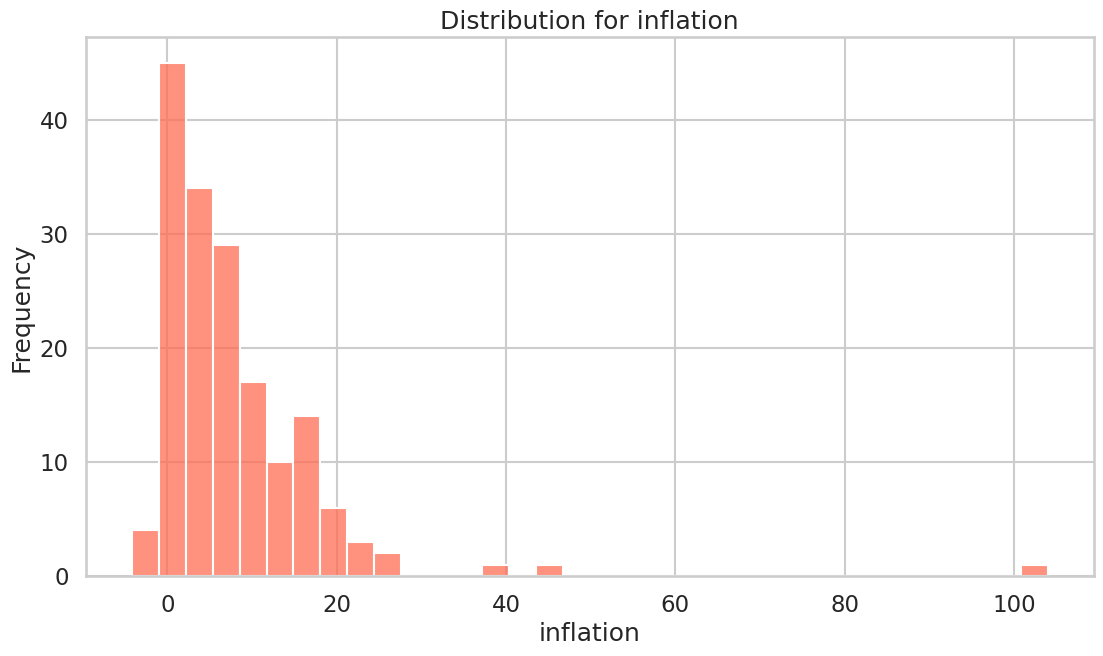

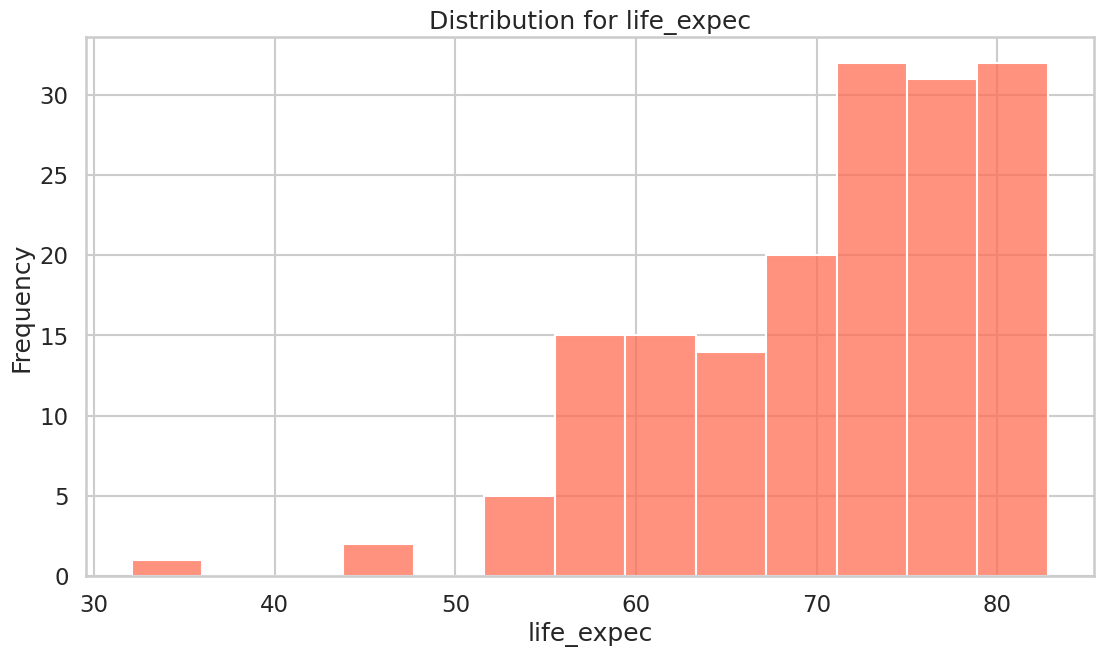

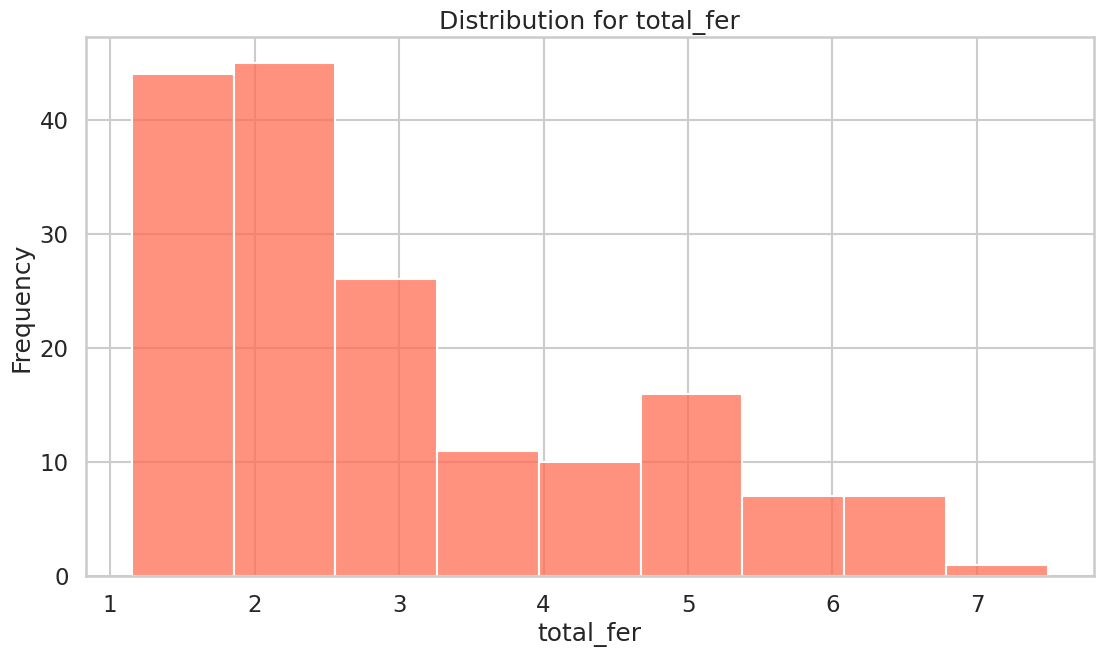

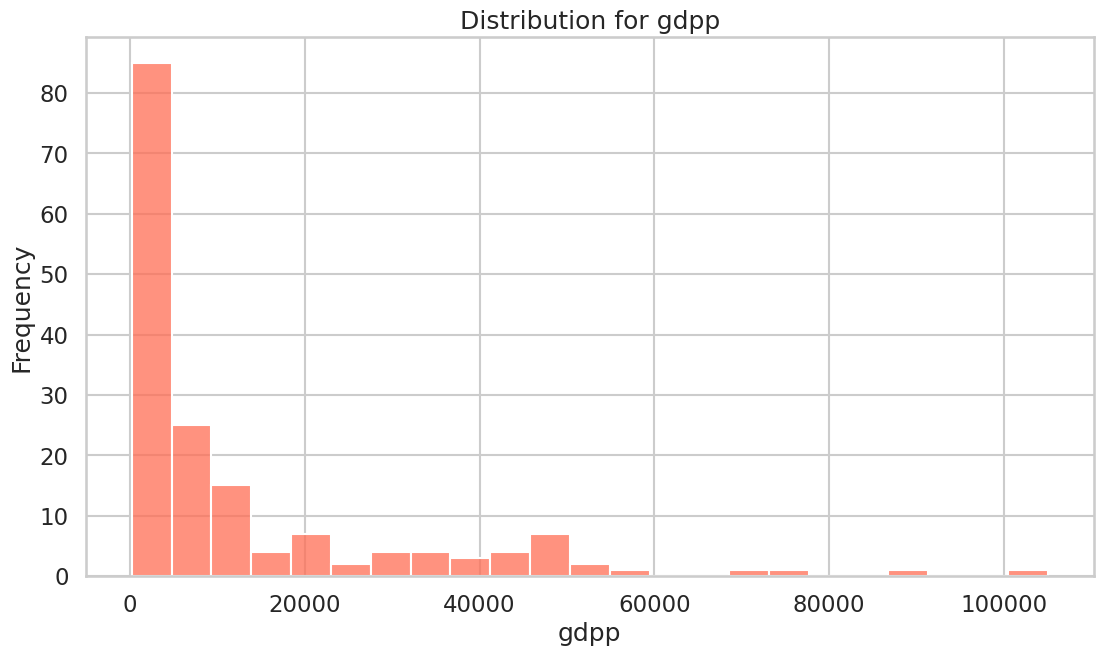

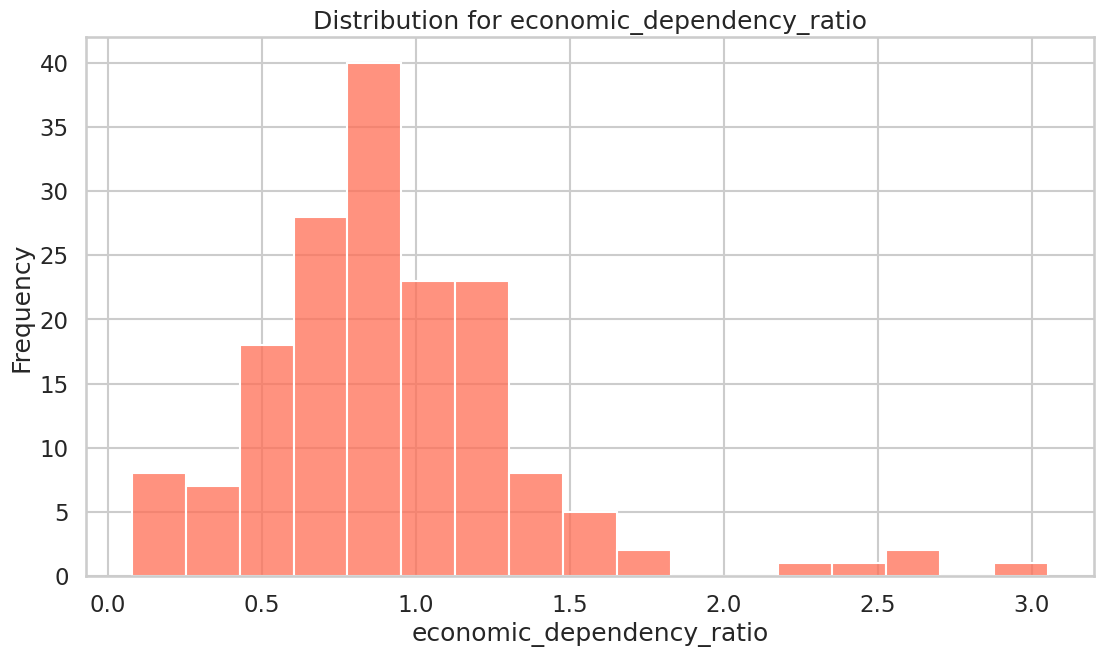

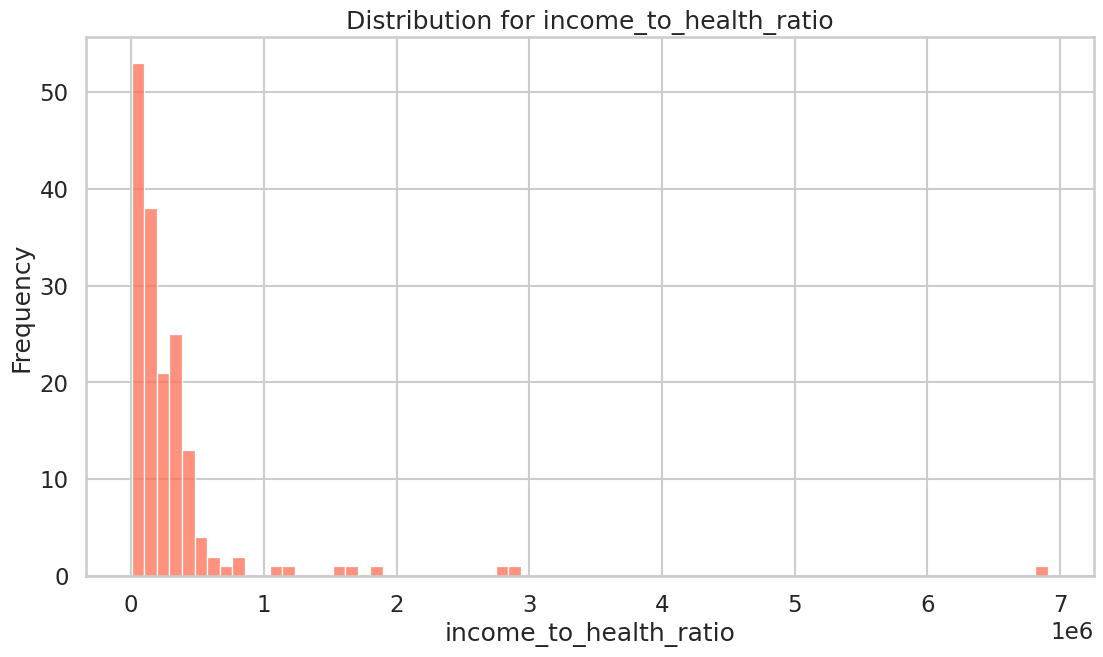

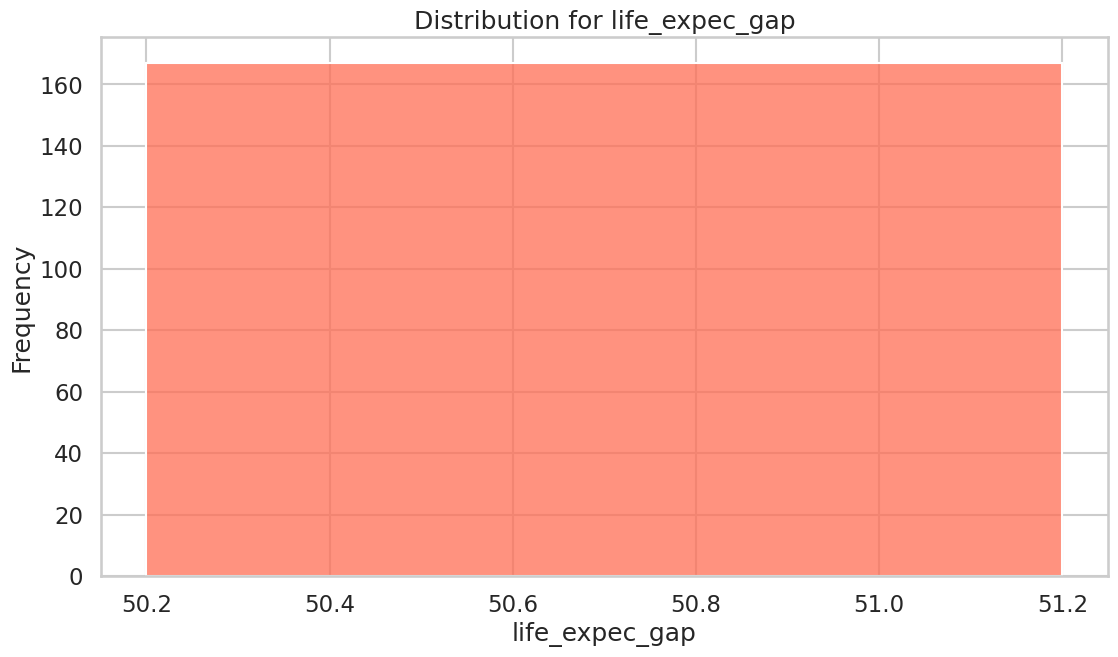

In [12]:
# distribution of features
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(13, 7))
    sns.histplot(x=col, data=df)
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

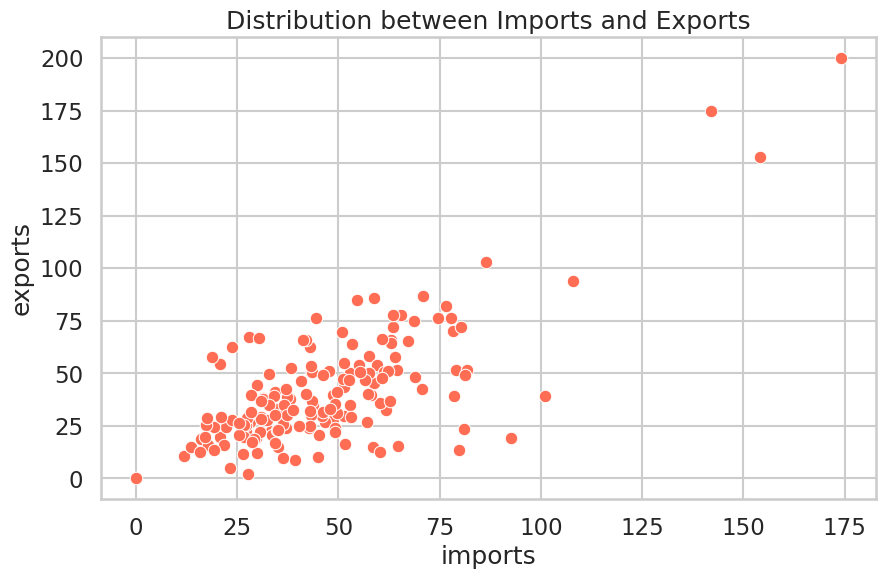

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imports', y='exports').set(title='Distribution between Imports and Exports')
plt.show();

From this image,the above we can see that there is a positive correlation between imports and exports, meaning that as imports increase, exports also tend to increase. We can also see that there are a few outliers, which may suggest that there are some countries that have a higher or lower level of imports and exports than the majority of countries.

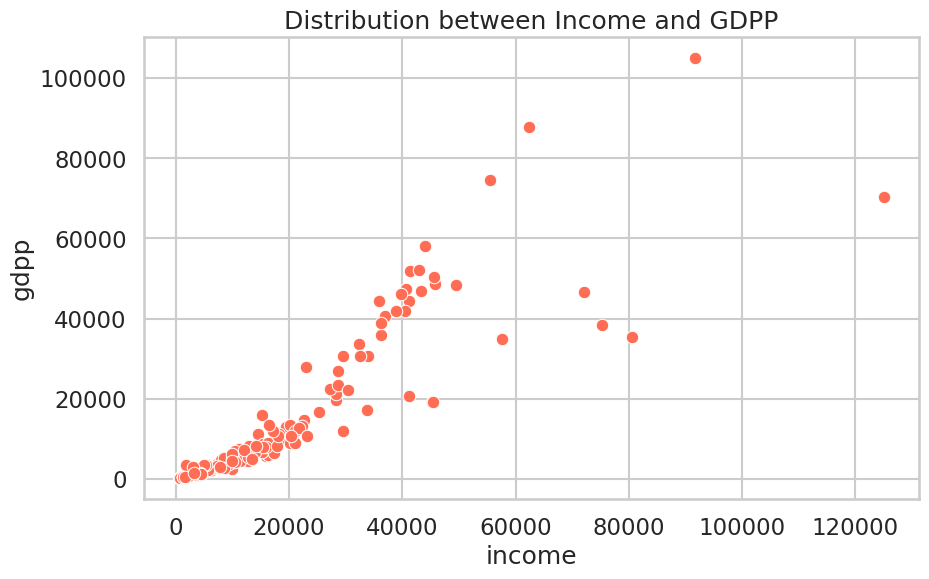

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='gdpp').set(title='Distribution between Income and GDPP')
plt.show();

There is a positive correlation between income and GDPP. This means that as income increases, GDPP also tends to increase.

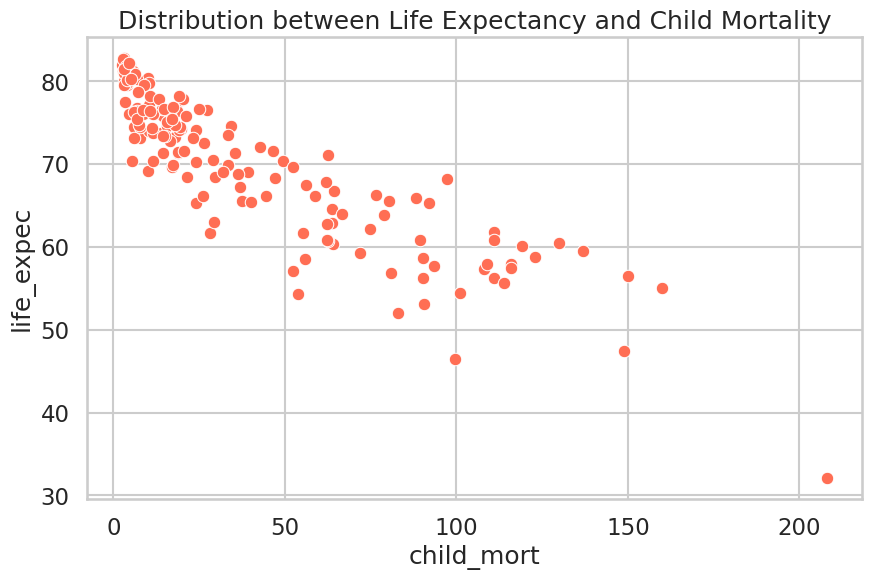

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='child_mort', y='life_expec').set(title='Distribution between Life Expectancy and Child Mortality')
plt.show();

The dots are clustered towards the top left of the plot, indicating a negative correlation between the two variables. Specifically, it appears that there is a negative correlation between life expectancy and child mortality, meaning that as child mortality decreases, life expectancy increases.

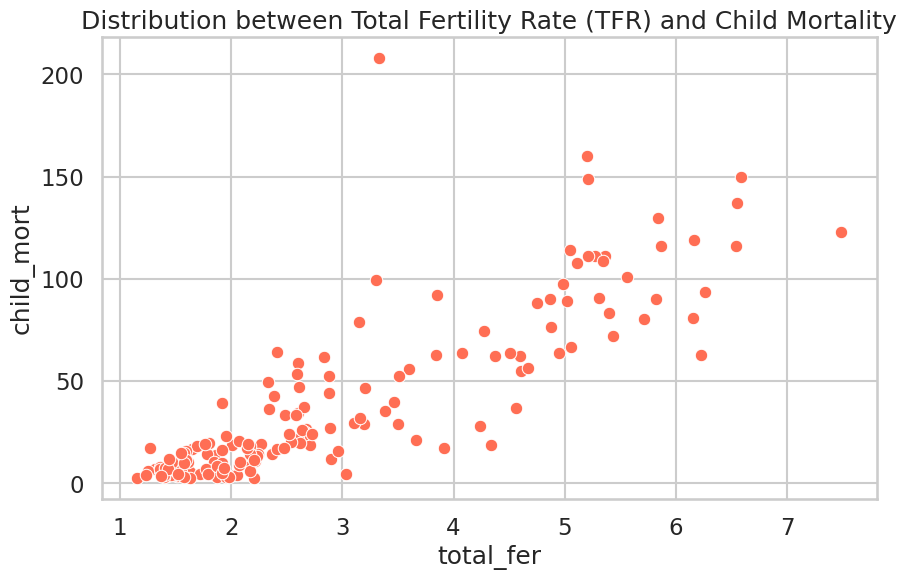

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_fer', y='child_mort').set(title='Distribution between Total Fertility Rate (TFR) and Child Mortality')
plt.show();

The insights that can be gained from the above is that there is a positive correlation between Total Fertility Rate (TFR) and Child Mortality. This means that as TFR increases, so does Child Mortality.

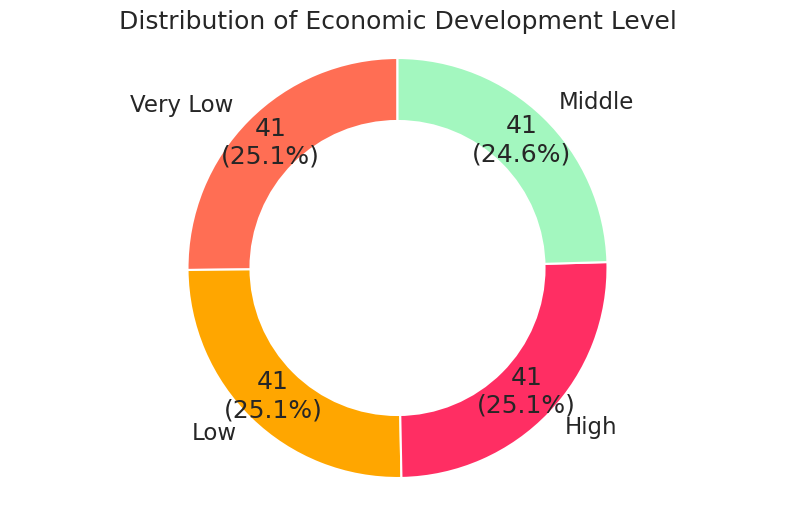

In [17]:
# Distribution of Economic Development Level
count_data = df['economic_development_level'].value_counts()
total_count = len(df)

plt.figure(figsize=(10, 6))
plt.pie(count_data, labels=count_data.index, autopct=lambda p: f'{int(p * total_count / 100)}\n({p:.1f}%)', startangle=90, pctdistance=0.85,
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Economic Development Level')
plt.axis('equal')
plt.show()

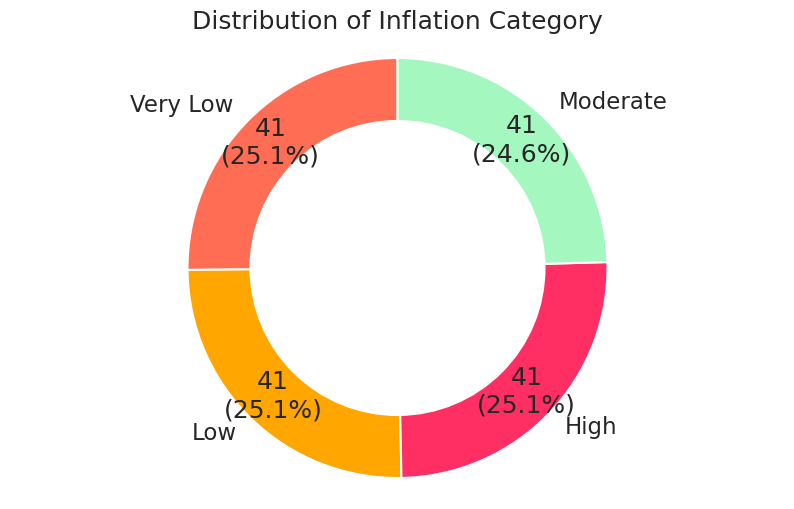

In [18]:
# Distribution of inflation category
count_data = df['inflation_category'].value_counts()
total_count = len(df)

plt.figure(figsize=(10, 6))
plt.pie(count_data, labels=count_data.index, autopct=lambda p: f'{int(p * total_count / 100)}\n({p:.1f}%)', startangle=90, pctdistance=0.85,
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Inflation Category')
plt.axis('equal')
plt.show()

#### Encoding categorical features and Scaling the data
Scaling/Standardizing the features ensures that all features have the same scale, which can make it easier for the model to learn the relationships between them. The StandardScaler() function will be used to achieve this.

In [19]:
cols = ['economic_development_level', 'inflation_category']
for col in cols:
    print(df[col].unique())

['Very Low', 'Low', 'Middle', 'High']
Categories (4, object): ['Very Low' < 'Low' < 'Middle' < 'High']
['Moderate', 'Low', 'High', 'Very Low']
Categories (4, object): ['Very Low' < 'Low' < 'Moderate' < 'High']


In [20]:
# encode the categorical features and scale the dataset
cols = ['economic_development_level', 'inflation_category']
for col in cols:
    df[col] = df[col].cat.codes
for col in cols:
    print(df[col].unique())


scaler = StandardScaler()
df = df.drop(['country'], axis=1)
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

[0 1 2 3]
[2 1 3 0]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,economic_dependency_ratio,economic_development_level,income_to_health_ratio,life_expec_gap,inflation_category
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-1.580519,-1.335772,-0.450569,7.105427e-15,0.448819
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.782954,-0.443476,-0.248698,7.105427e-15,-0.443476
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0.676702,0.448819,-0.004419,7.105427e-15,1.341115
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1.194138,-0.443476,-0.162887,7.105427e-15,1.341115
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.339811,0.448819,0.007036,7.105427e-15,-1.335772


## Building the Clustering Algorithms to Segment the Data

Here, different clustering algorithms and Evaluation metrics will be explored to try to choose the optimal number of clusters for the dataset.

### DBSCAN: Density-Based Clustering

[DBSCAN (Density-Based Spatial Clustering of Applications with Noise)](https://ai.plainenglish.io/dbscan-density-based-clustering-aaebd76e2c8c) is a widely used density-based clustering algorithm. It groups together points that are closely packed together (points with many adjacent neighbors), while filtering out noise points that lie in low-density regions.

In [21]:
# scaling data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,economic_dependency_ratio,economic_development_level,income_to_health_ratio,life_expec_gap,inflation_category
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-1.580519,-1.335772,-0.450569,7.105427e-15,0.448819
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.782954,-0.443476,-0.248698,7.105427e-15,-0.443476
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0.676702,0.448819,-0.004419,7.105427e-15,1.341115
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1.194138,-0.443476,-0.162887,7.105427e-15,1.341115
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.339811,0.448819,0.007036,7.105427e-15,-1.335772


Choosing the best values for the below parameters
- Epsilon (ϵ): The radius of the neighborhood around a data point.
- MinPts (Minimum Points): The minimum number of data points required to be within the ϵ-radius of a given point.

In [22]:
# Define a range of eps and min_samples values to search
param_grid = {
    'eps': [0.5, 1.0, 1.5, 2.0],
    'min_samples': [2, 3, 4, 5]
}

# Create the DBSCAN model
dbscan = DBSCAN()

# Define scoring functions for Silhouette Score and Davies-Bouldin Index
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X, cluster_labels)
    return -1  # Return a negative value if only one cluster is found

def davies_bouldin_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(set(cluster_labels)) > 1:
        return davies_bouldin_score(X, cluster_labels)
    return np.inf  # Return a large value if only one cluster is found

# Perform grid search with Silhouette Score as the scoring metric
grid_search = GridSearchCV(
    dbscan,
    param_grid,
    cv=5,
    scoring={'Silhouette Score': silhouette_scorer, 'Davies-Bouldin Index': davies_bouldin_scorer},
    refit='Silhouette Score'
)
grid_search.fit(df_scaled)

# Get the best combination of parameters
best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']

**Fitting data with the best parameters** <br>
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)<br>
dbscan.fit(df_scale)<br>

In [23]:
# Fit DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = best_dbscan.fit_predict(df_scaled)

# Get the number of clusters (excluding noise points)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Get the number of noise points (outliers)
num_noise_points = list(cluster_labels).count(-1)

# Print the best parameters and results
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points (Outliers): {num_noise_points}")

Best eps: 2.0
Best min_samples: 2
Number of Clusters: 4
Number of Noise Points (Outliers): 20


In [24]:
print('Corresponding Davies-Bouldin Index: ', davies_bouldin_score(df_scaled, cluster_labels))
print('Best Silhouette Score:', silhouette_score(df_scaled, cluster_labels))

Corresponding Davies-Bouldin Index:  2.390468221451481
Best Silhouette Score: 0.05246672101295396


In [25]:
np.unique(cluster_labels, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([ 20, 141,   2,   2,   2]))

In [26]:
def plot_dbscan_clusters(data, cluster_labels, my_colors):
    unique_labels = np.unique(cluster_labels)
    n_clusters = len(unique_labels) - 1  # Exclude noise points (-1)

    plt.figure(figsize=(10, 6))
    for cluster_label in unique_labels:
        if cluster_label == -1:
            color = 'black'
            legend_label = 'Noise'
        else:
            color = my_colors[cluster_label]
            legend_label = f'Cluster {cluster_label}'

        # Extract data points belonging to the current cluster label
        cluster_data = data[cluster_labels == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=legend_label)

    plt.title(f'DBSCAN Clustering (Number of Clusters: {n_clusters})')
    plt.legend()
    plt.show()

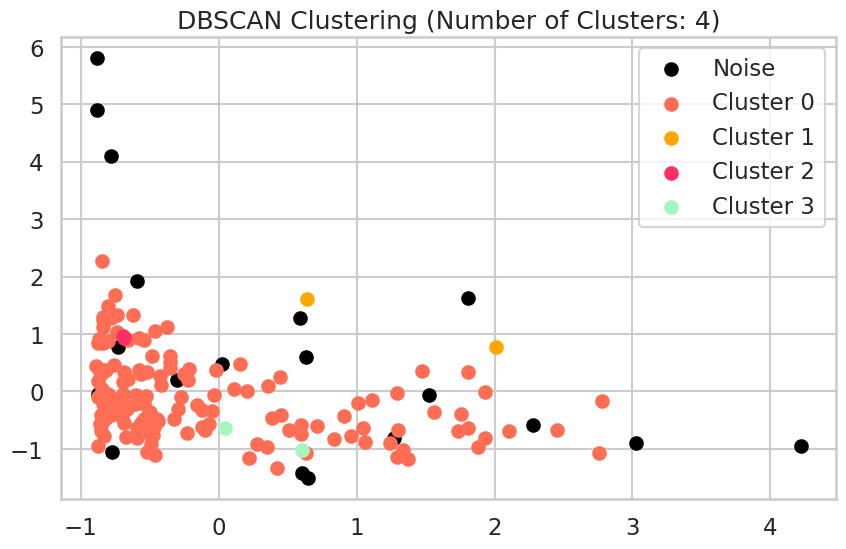

In [27]:
plot_dbscan_clusters(df_scaled.values, cluster_labels, my_colors)

### Cluster Profiling
This involves the profiling of the segments by studying the patterns of the clusters.

In [30]:
df['clusters_db'] = cluster_labels

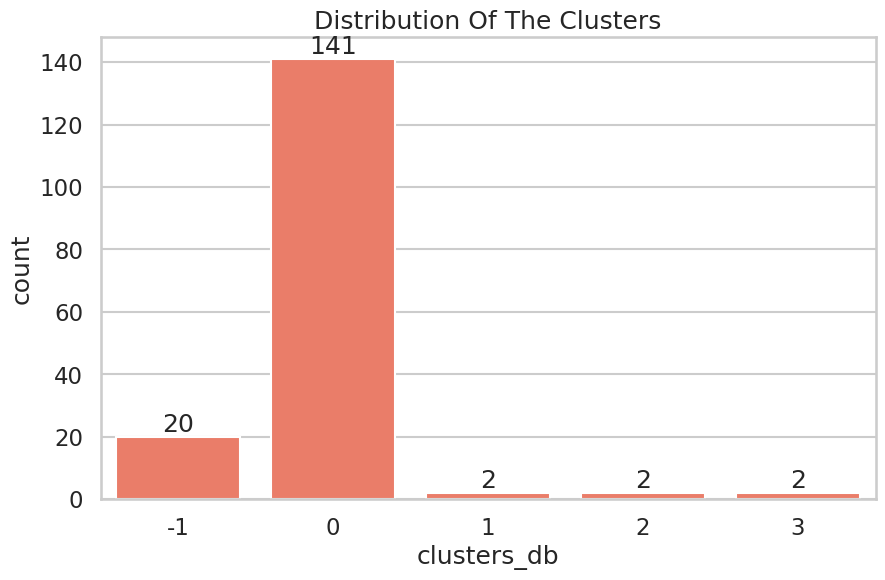

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["clusters_db"], color=my_colors[0])
ax.set_title("Distribution Of The Clusters")
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show();

In [32]:
# Define custom colors for the clusters
clusters_palette = {
    -1: '#000000',
    0: '#FF0000',
    1: '#00FF00',
    2: '#0000FF',
    3: '#FFFF00'
}

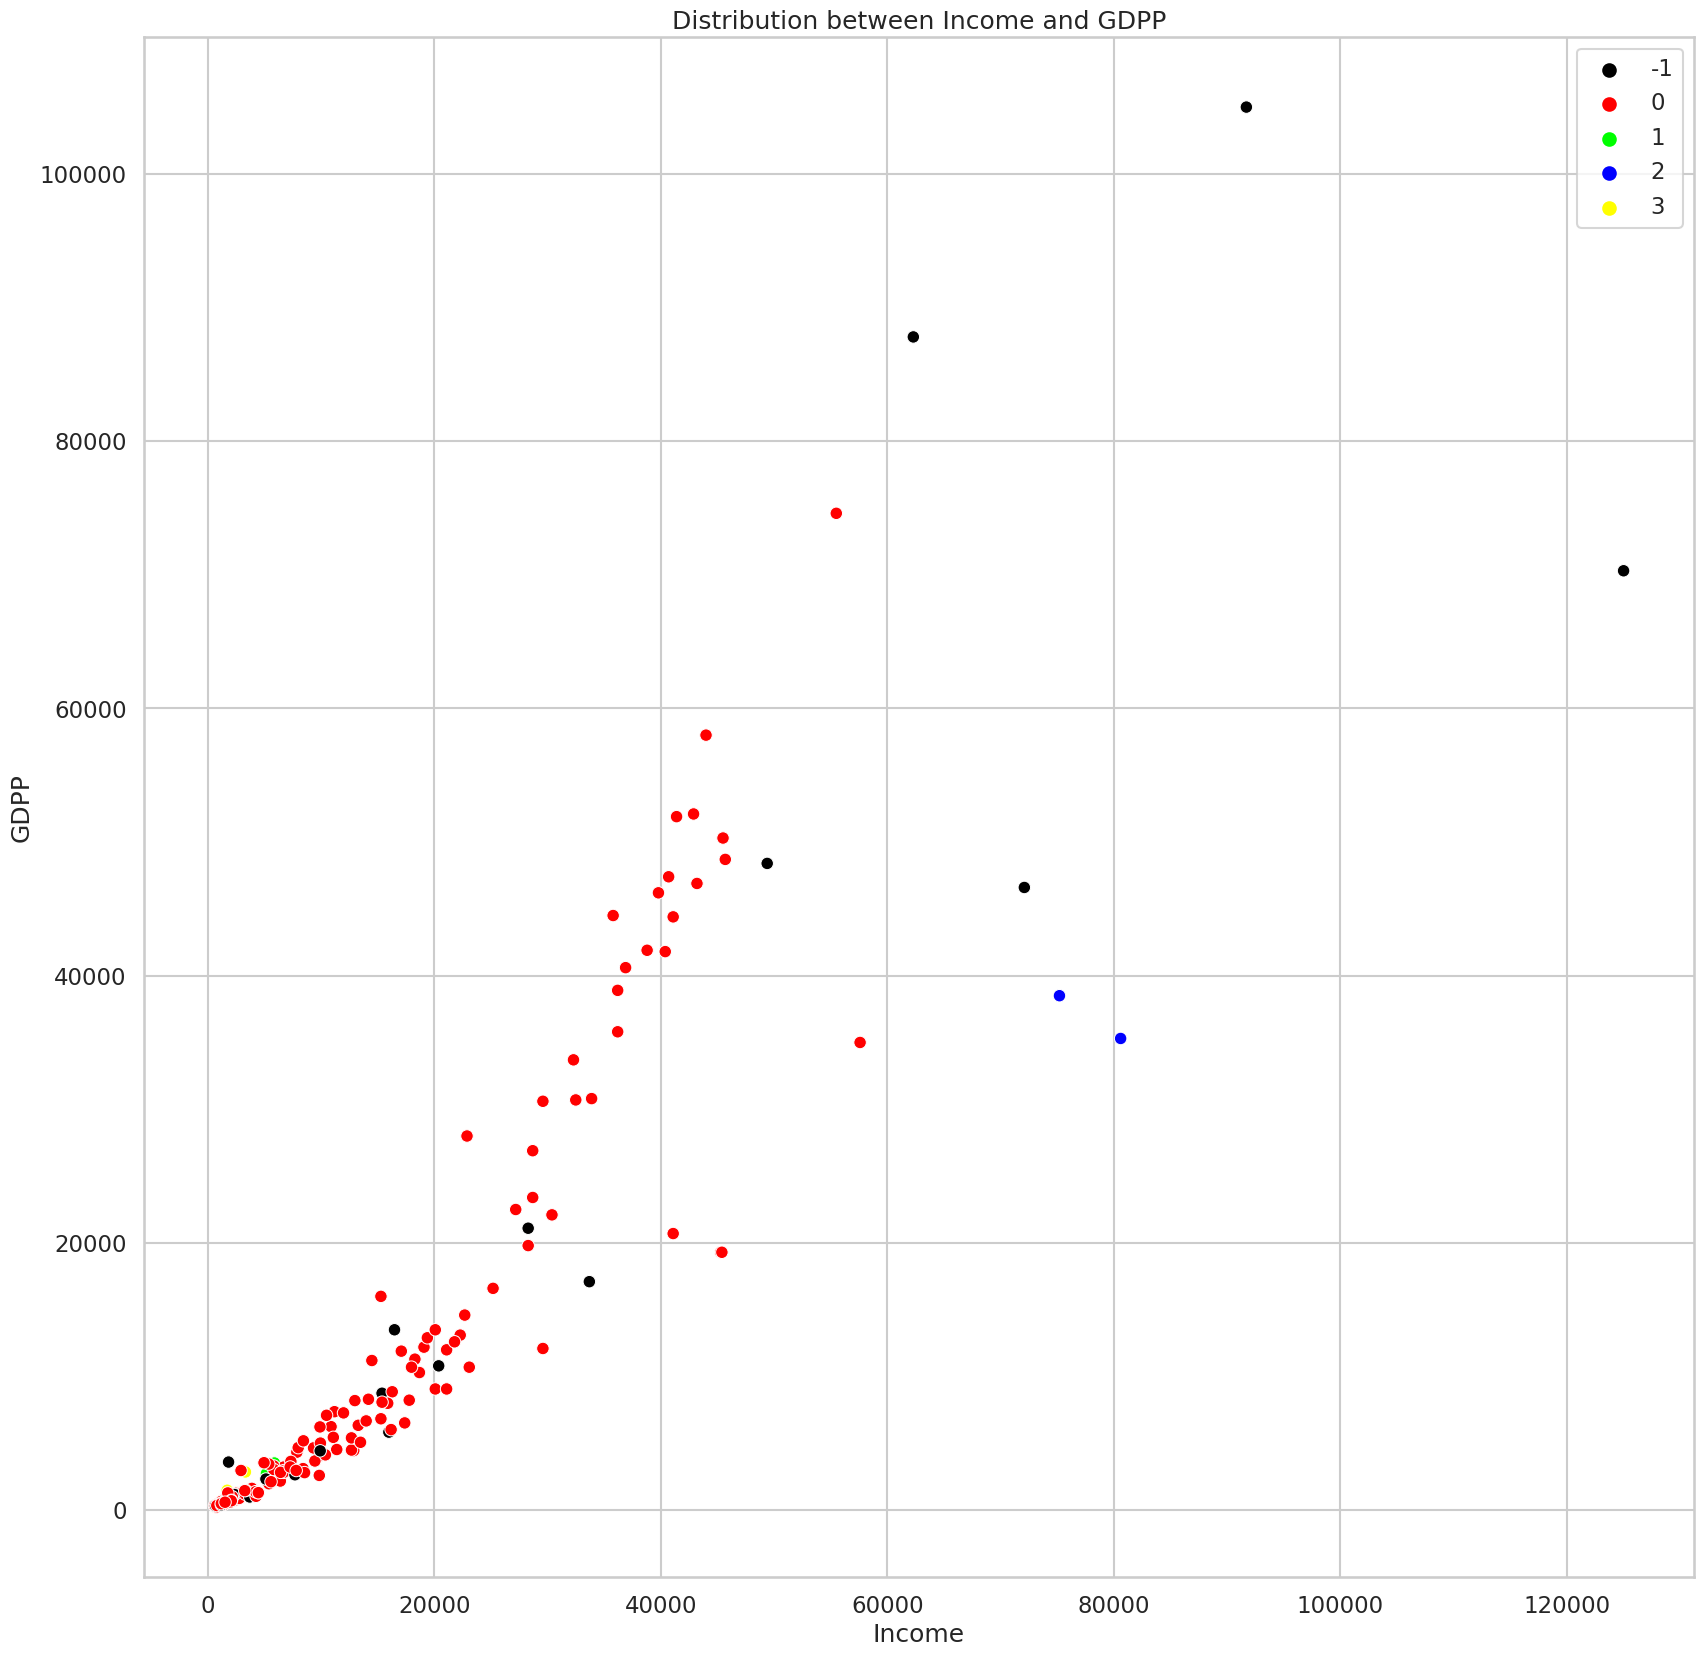

In [34]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='income', y='gdpp', hue='clusters_db', palette=clusters_palette)
plt.title('Distribution between Income and GDPP')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.legend()
plt.show()

**Insights** <br><br>
Outliers (Black): This are points in Cluster -1 which are data points that do not align with any specific cluster. These outliers exhibit extreme income or GDPP values compared to the rest of the dataset. They could represent regions with unique circumstances or characteristics impacting their income and GDPP, such as political instability, conflict, sanctions, or other factors.

Cluster 0 (Red): This cluster comprises countries or regions with the lowest income and GDPP among the clusters. These areas may be characterized as underdeveloped or economically challenged, with limited economic output and growth.

Cluster 1 (Green): Cluster 1 exhibits low income but relatively high GDPP. It may represent areas with a small population but a substantial economic output per person, or those receiving substantial foreign aid or investment.

Cluster 2 (Blue): Cluster 2 showcases high income and high GDPP, signifying developed or affluent countries or regions with substantial economic output and growth.

Cluster 3 (Yellow): This cluster portrays regions with low income but low GDPP. It signifies underdevelopment in a country.

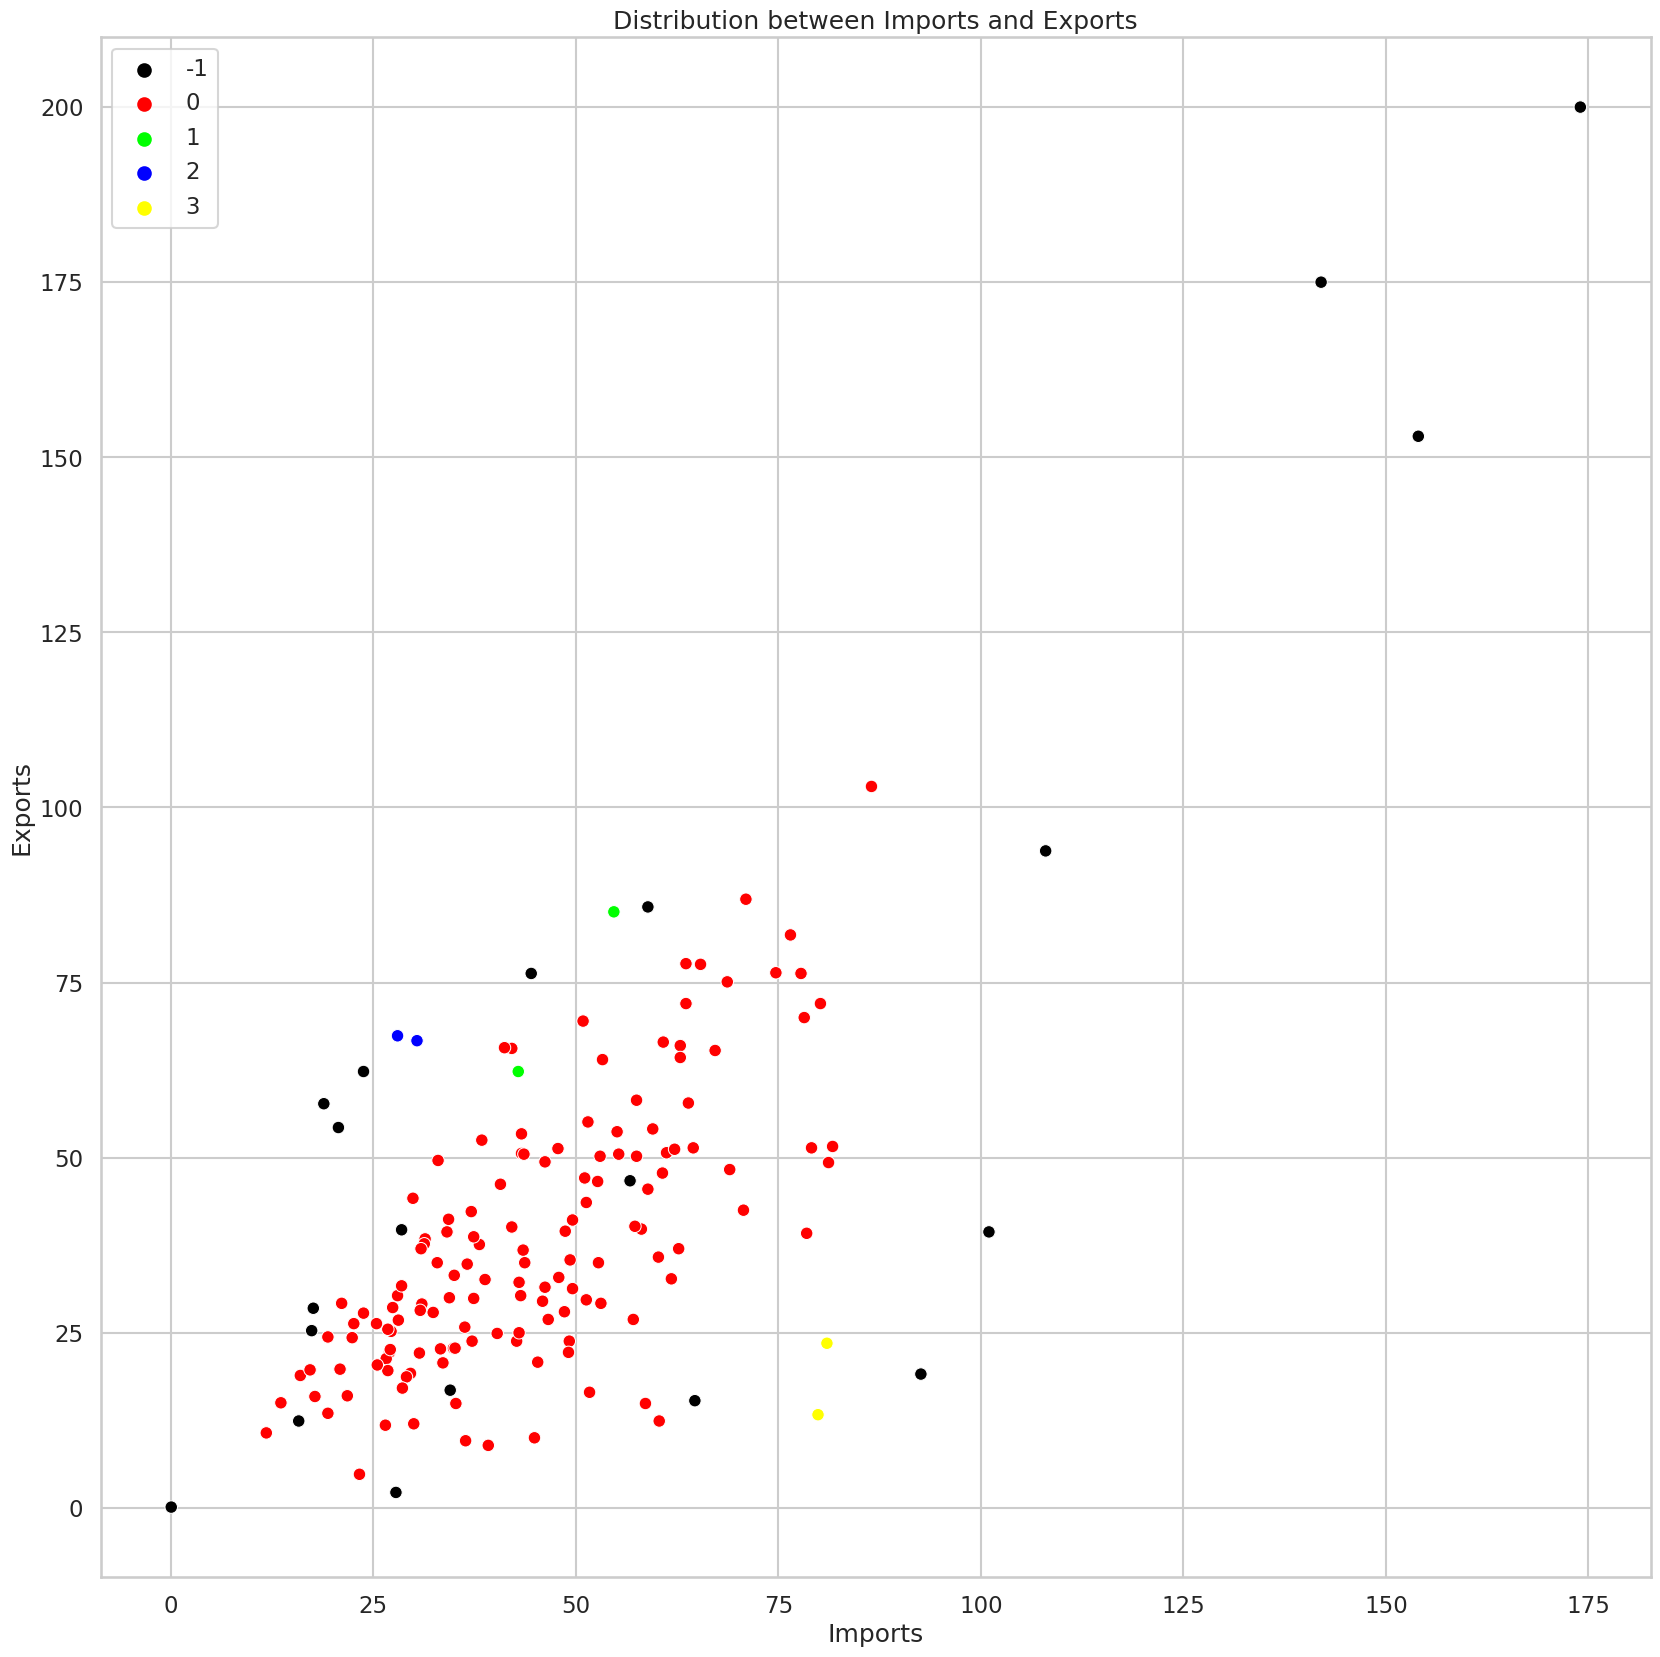

In [35]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='imports', y='exports', hue='clusters_db', palette=clusters_palette)
plt.title('Distribution between Imports and Exports')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.legend()
plt.show()

**Insights** <br><br>
The plot reveals a noticeable positive correlation between imports and exports. As imports increase, exports tend to increase as well. This correlation is observed through the general trend of data points clustering in the direction from the bottom-left to the top-right of the plot. It suggests that countries or regions with higher imports also tend to have higher export levels, indicating active trade relationships.

Outliers (Black): The presence of black data points identifies outliers—data points that deviate significantly from the general trend. These outliers may represent countries or regions with unique trade dynamics or trade patterns influenced by external factors.

Red Cluster (Cluster 0): The majority of data points fall within the red cluster, signifying countries or regions with relatively balanced trade, where imports and exports are proportional. This cluster represents the standard trade pattern.

Green Cluster (Cluster 1): The green cluster, on the other hand,  indicates countries having a higher level of export with a relatively high level of imports too.

Blue Cluster (Cluster 2): The blue clusters includes data points that dont deviate really much from the red indicating that countries like this too have a relatively balanced trade level.

Yellow Cluster (Cluster 3): The yellow cluster is another outlier, characterized by very low export rate and a high import rate too. These may indicate countries in this clusters are highly dependent on foreign goods and services.

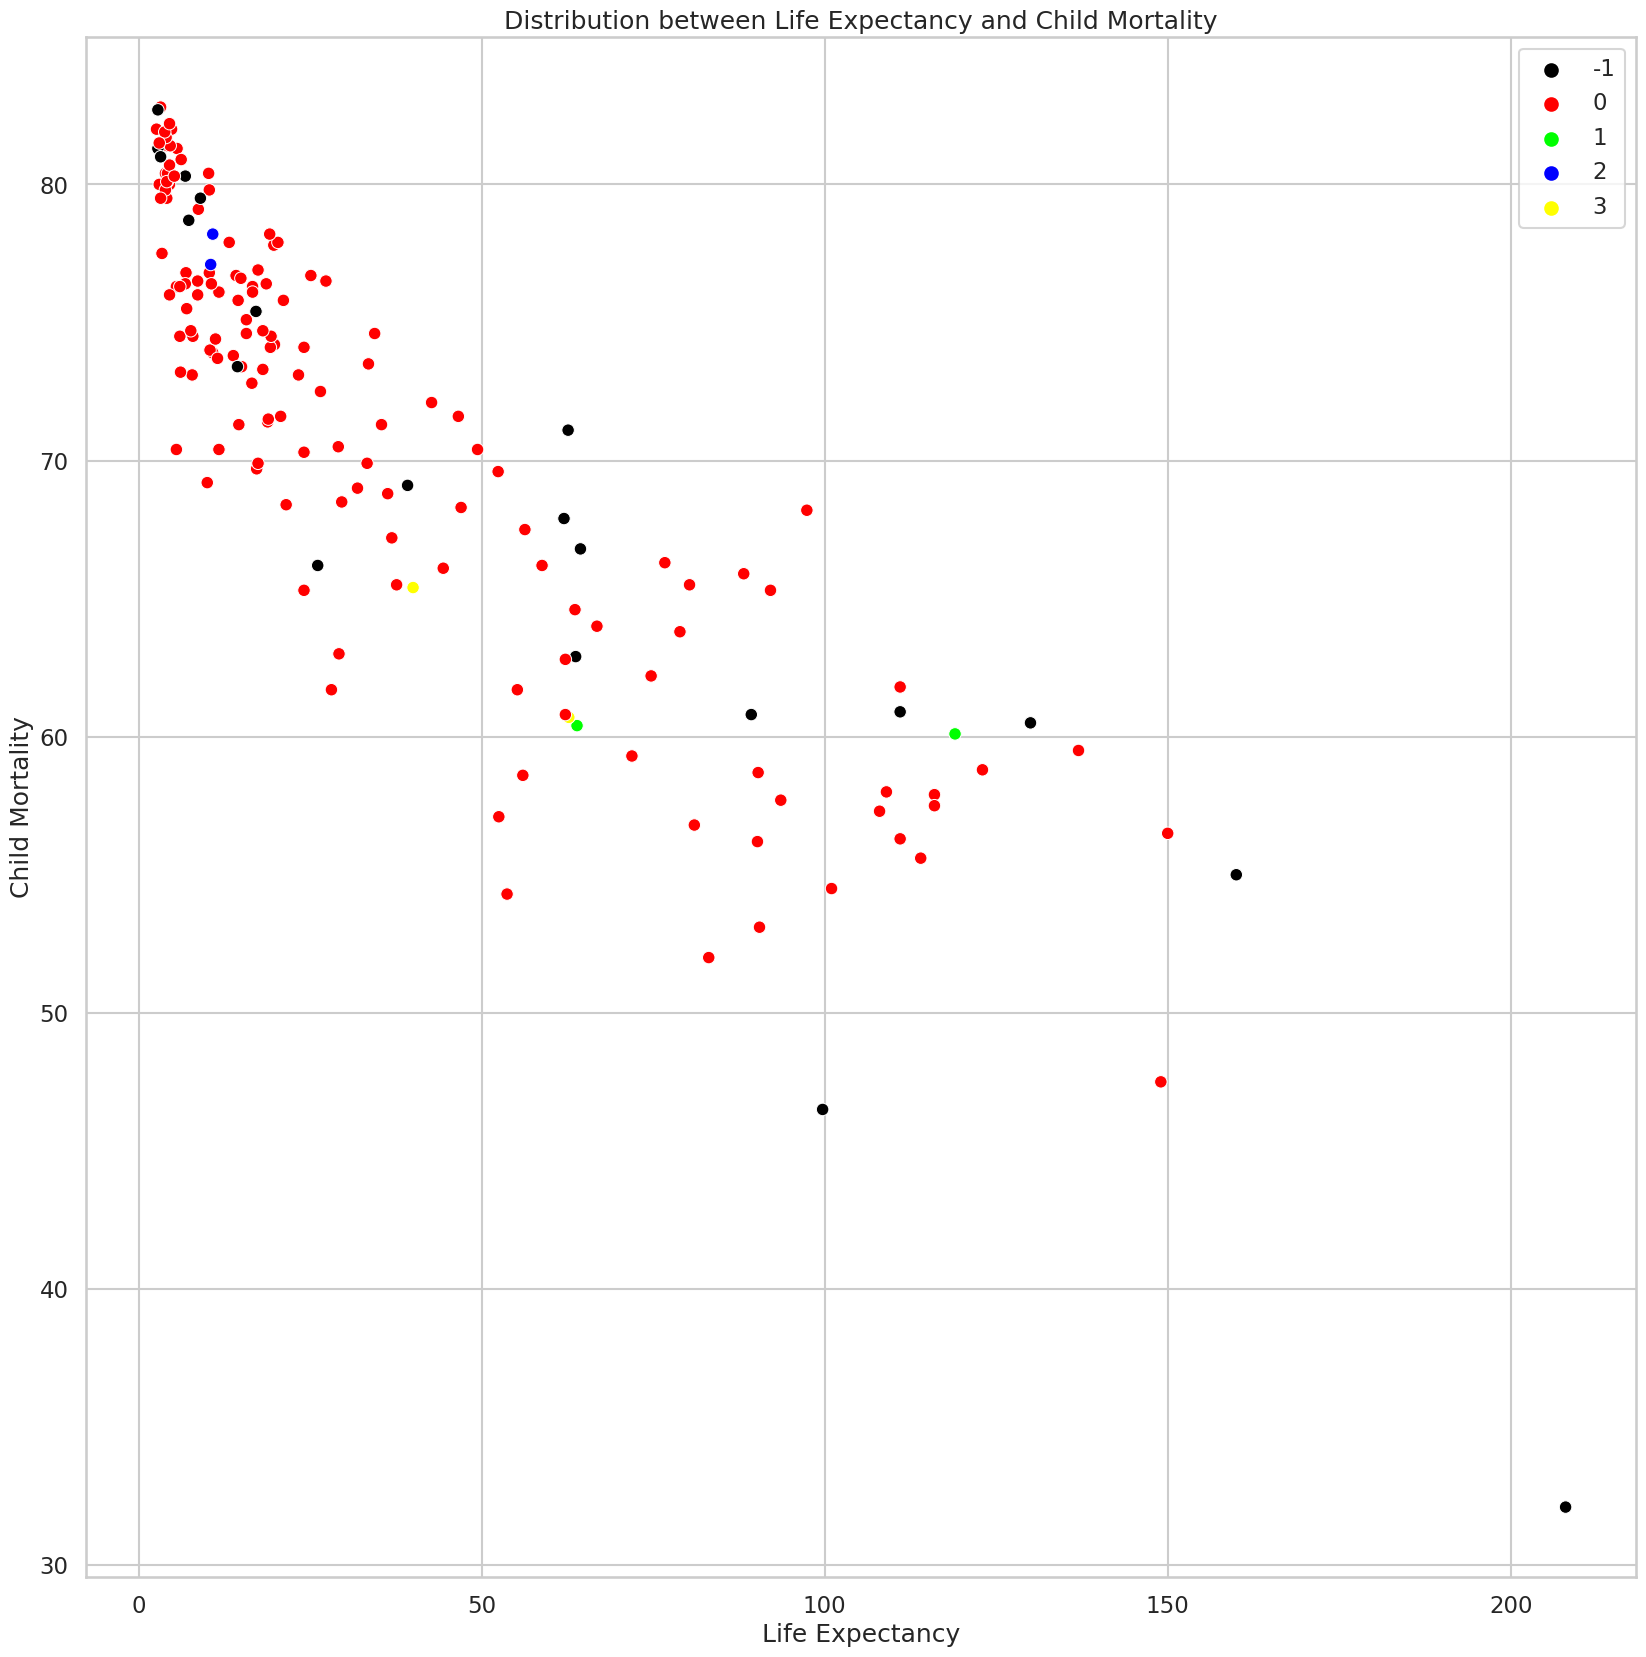

In [37]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='child_mort', y='life_expec', hue='clusters_db', palette=clusters_palette)
plt.title('Distribution between Life Expectancy and Child Mortality')
plt.xlabel('Life Expectancy')
plt.ylabel('Child Mortality')
plt.legend()
plt.show()

**Insights** <br><br>
 The plot distinctly illustrates a negative correlation between Life Expectancy and Child Mortality. As Life Expectancy increases, Child Mortality rates tend to decrease. This trend underscores the importance of improving healthcare and living conditions, as higher life expectancy is often associated with lower child mortality.

Outliers (Black): The presence of black data points on the plot draws attention to outliers—data points that significantly deviate from the general trend. These outliers may represent countries or regions with unique or unusual living dynamics, warranting further investigation to understand the factors contributing to their distinct health patterns.

Red Cluster (Cluster 0):  The majority of data points cluster within the red cluster, indicating countries with relatively balanced child mortality rates and life expectancy. This cluster represents regions where healthcare and living conditions are harmonized, resulting in favorable life expectancies and lower child mortality rates. It serves as a benchmark for the standard health and well-being profile.

Green Cluster (Cluster 1): The green cluster, on the other hand,  indicates countries having a high child mortality rate and a high life expectancy too. This cluster may suggest unique circumstances where healthcare interventions have led to extended life expectancies despite ongoing child mortality challenges.

Blue Cluster (Cluster 2): The presence of countries within the blue cluster reflects a distressing scenario. These countries exhibit exceptionally high child mortality rates and extremely low life expectancies. This cluster signals a critical need for urgent healthcare and social interventions to address the alarming health disparities.

Yellow Cluster (Cluster 3): The yellow cluster is characterized by high child mortatlity rates and a relatively low life expectancy. This scenario points to regions where healthcare and living conditions may be lagging behind, resulting in comparatively lower life expectancies and higher child mortality rates.

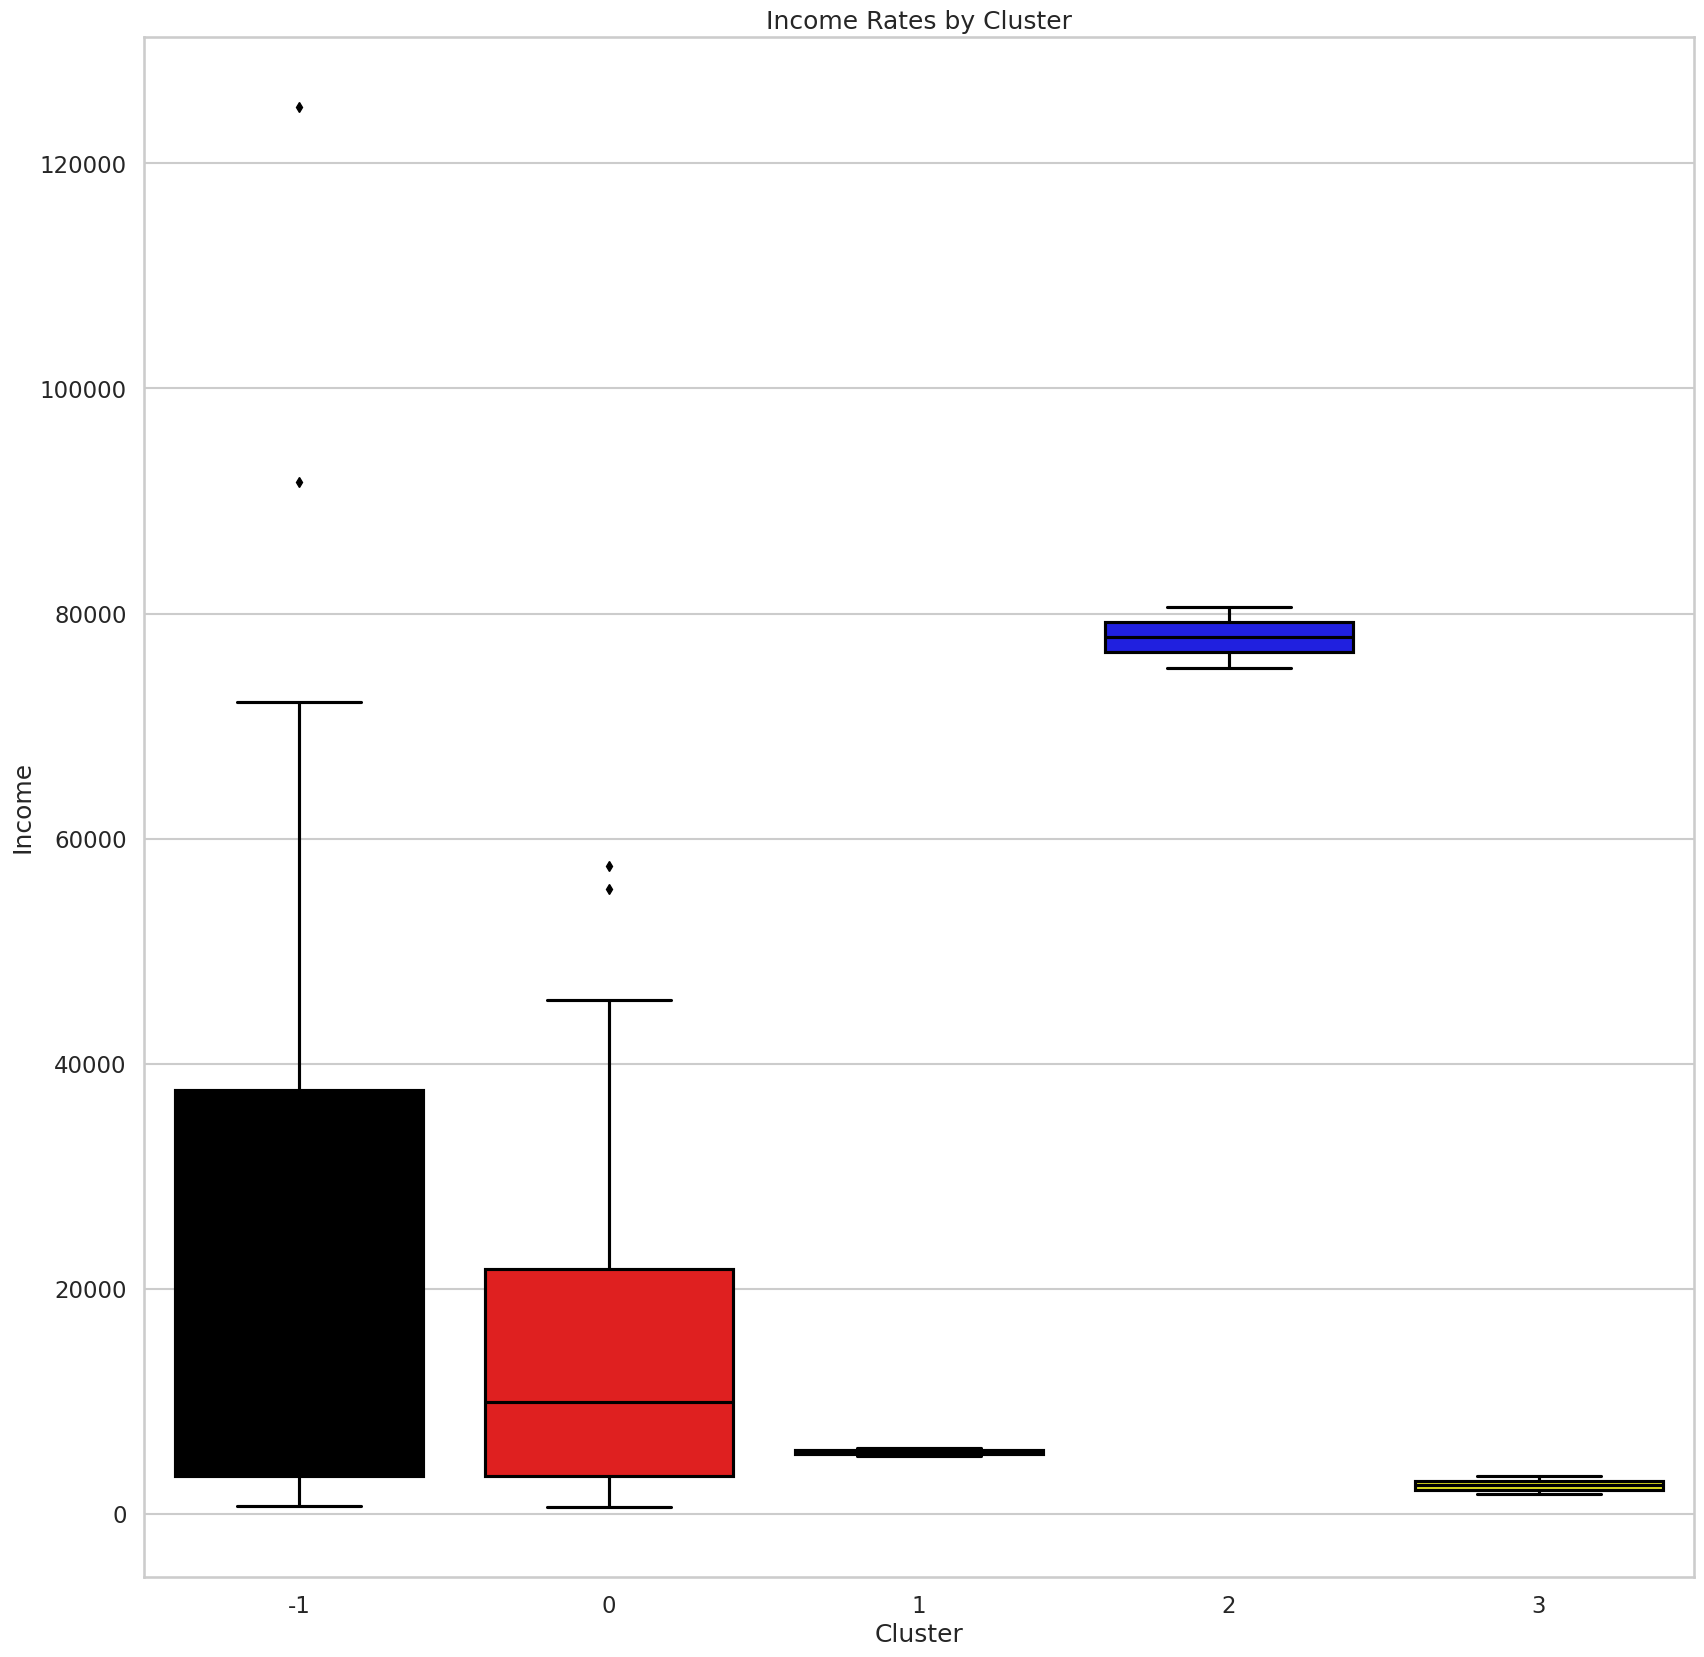

In [66]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, x='clusters_db', y='income', palette=clusters_palette)
plt.title('Income Rates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

**Insights** <br><br>
The box plot offers insights into income rates categorized by clusters. Each cluster is color-coded: the black box signifies outliers, the red box corresponds to cluster 0, the green box represents cluster 1, the blue box symbolizes cluster 2, and the yellow box portrays cluster 3.

Outliers' Income Profile: The outliers, depicted in black, represent data points with income rates significantly deviating from the norm. Notably, they display the lowest median income among all clusters and possess the most restricted income range. These outliers may represent unique cases or exceptional economic conditions within the dataset.

Median Income Ranking: Cluster 2 stands out with the highest median income, positioning it as the most economically prosperous group. It is followed by cluster -1, cluster 0, and cluster 3 in descending order of median income. This ranking reveals a distinct disparity in income distribution among the clusters. lower life expectancies and higher child mortality rates.

Income Range Variation: When considering the spread of income rates within each cluster, cluster 2 exhibits the broadest range, indicating a considerable diversity of income levels within this group. Following cluster 2, cluster -1 and cluster 0 also showcase notable income variability. In contrast, cluster 1 demonstrates a relatively narrower income range compared to the other clusters.

## Conclusion

In this project, we applied DBSCAN as our clustering algorithm to analyze a dataset encompassing various socio-economic factors. The results revealed significant insights into different clusters and their characteristics. <br><br>

**Highlights** <br><br>
*Cluster Analysis*
The dataset was segmented into distinct clusters, including outliers denoted by black data points in Cluster -1. These outliers represented regions facing unique circumstances, possibly due to political instability, conflict, or sanctions. Cluster 0 (Red) included countries with the lowest income and GDPP, signaling underdevelopment. Cluster 1 (Green) depicted regions with low income yet relatively high GDPP, possibly due to foreign aid or efficient economic output. Cluster 2 (Blue) comprised economically prosperous countries with high income and GDPP. Cluster 3 (Yellow) represented areas with low income and low GDPP, indicating underdevelopment.

*Trade Analysis*
An examination of trade relationships unveiled a notable positive correlation between imports and exports, highlighting active trade patterns. Outliers in black represented data points with unique trade dynamics, influenced by external factors. Cluster 0 (Red) featured balanced trade with proportional imports and exports. Cluster 1 (Green) showcased higher exports and relatively high imports, suggesting active trade engagement. Cluster 2 (Blue) reflected balanced trade patterns, not deviating significantly from the standard. Cluster 3 (Yellow) exhibited a high level of imports and very low export rates, implying a reliance on foreign goods and services.

*Health Analysis*
The analysis of health-related factors revealed a clear negative correlation between Life Expectancy and Child Mortality, emphasizing the significance of healthcare and living conditions. Black outliers were indicative of regions with unique or unusual living dynamics. Cluster 0 (Red) encompassed areas with balanced child mortality rates and life expectancy, portraying harmonized health and well-being. Cluster 1 (Green) represented unique circumstances where healthcare interventions led to extended life expectancies despite high child mortality rates. Cluster 2 (Blue) depicted a distressing scenario with extremely high child mortality rates and very low life expectancies, urging immediate healthcare and social interventions. Cluster 3 (Yellow) signified regions with lagging healthcare and living conditions, resulting in comparatively lower life expectancies and higher child mortality rates.

*Income Analysis*
A comprehensive examination of income rates through box plots exposed intriguing disparities. Black outliers featured significantly deviating income rates, with the lowest median income and the narrowest income range, potentially indicating unique economic conditions. Cluster 2 held the highest median income, followed by Cluster -1, Cluster 0, and Cluster 3. This ranking underscored stark disparities in income distribution. Cluster 2 demonstrated the broadest income range, with Clusters -1 and 0 also showing significant income variability. Cluster 1, in contrast, displayed a relatively narrower income range. <br><br>

**Further Improvements** <br><br>
To enhance the analysis, several potential improvements can be implemented. Further feature engineering could help in creating more relevant variables or combining existing ones for a more comprehensive perspective. Additionally, the integration of additional clustering algorithms including KMeans, Agglomerative Clustering algorithms could provide more robust results. Furthermore, incorporating geographical and geopolitical factors may offer a deeper understanding of the dataset. Lastly, advanced visualization techniques and interactive dashboards can make the results more accessible and insightful for stakeholders.